In [1]:
import os
from utils.buffer import SharedReplayBuffer
import numpy as np
from env.robot_1d import CorridorEnv, CorridorEnv_v2, CorridorFullyVisibleEnv, RandomRobotEnv, CorridorMultiAgentEnv
from runner.runner_ma import RunnerMA
from alg.actor_critic import Actor, Critic

In [2]:
import argparse

args = argparse.Namespace(
    episode_length=3,
    n_rollout_threads=1,
    gamma=0.99,
    gae_lambda=0.95,
    _use_gae=True
)
env = CorridorMultiAgentEnv(17, 2)

num_agents = env.num_agents
obs_space = env.observation_space
cent_obs_space = env.share_observation_space
act_space = env.action_space

buffer = SharedReplayBuffer(args, num_agents, obs_space, cent_obs_space, act_space)

In [3]:
args = argparse.Namespace(
    hidden_size=64,
    n_rollout_threads=1,
    gamma=0.99,
    gae_lambda=0.95,
    _use_gae=True,
    gain=0.01,
    use_orthogonal = True,
    use_feature_normalization = True,
    use_ReLU = True,
    layer_N = 1,
)

actor = Actor(args, 13, 5)
critic = Critic(args, 12)

In [4]:
env.reset()
env.render()

.|.|.|.|.|.|2|.|.|.|.|.|.|.|.|.|C1


In [5]:
# ava = runner.buffer.available_actions[0]
# ava

In [6]:
# cobs = runner.buffer.share_obs[0]
# cobs

### Runner

In [7]:
# Example configuration
class Args:
    def __init__(self):
        self.env_name = 'CorridorEnvMA'
        self.algorithm_name = 'PPO'
        self.experiment_name = 'corridor_experiment'
        self.use_centralized_V = True
        self.num_env_steps = 1000000
        self.episode_length = 10000
        self.n_rollout_threads = 1
        self.use_linear_lr_decay = False
        self.hidden_size = 64
        self.gamma = .99
        self.gae_lambda = .95
        self._use_gae = True
        self.actor_lr = 7e-4
        self.critic_lr = 1e-3
        self.opti_eps=1e-5
        self.weight_decay=0
        self.gamma=0.99
        self.clip_param=0.2
        self.value_loss_coef=1
        self.entropy_coef=0.01
        self.ppo_epoch=10
        self.num_mini_batch=1
        self.huber_delta=10.0
        self.use_huber_loss=True
        self.use_clipped_value_loss=True
        self.gain = 0.01
        self.use_orthogonal = True
        self.use_feature_normalization = True
        self.use_ReLU = True
        self.layer_N = 1
        self.log_interval = 1000  # log every x steps
        

# Assuming CorridorEnv is defined as in your previous example
num_cells = 67
num_agents = 2
env = CorridorMultiAgentEnv(num_cells=num_cells, num_agents=num_agents)

config = {
    'all_args': Args(),
    'env': env,
    'device': 'cpu',
    'num_agents': 2,
}
runner = RunnerMA(config)

In [25]:
obs, sh, av, inf = env.reset()
sh.shape

(12,)


0 / 100 episodes, total number of timesteps: 10000/1000000, FPS 2839. 
average episode rewards is -4898.999929428101 (av.reward: -0.48989999294281006 * ep_length 10000)

1 / 100 episodes, total number of timesteps: 20000/1000000, FPS 2735. 
average episode rewards is -4848.499894142151 (av.reward: -0.4848499894142151 * ep_length 10000)

2 / 100 episodes, total number of timesteps: 30000/1000000, FPS 2751. 
average episode rewards is -4646.500051021576 (av.reward: -0.4646500051021576 * ep_length 10000)

3 / 100 episodes, total number of timesteps: 40000/1000000, FPS 2751. 
average episode rewards is -4494.999945163727 (av.reward: -0.4494999945163727 * ep_length 10000)

4 / 100 episodes, total number of timesteps: 50000/1000000, FPS 2751. 
average episode rewards is -4192.000031471252 (av.reward: -0.41920000314712524 * ep_length 10000)

5 / 100 episodes, total number of timesteps: 60000/1000000, FPS 2676. 
average episode rewards is -4797.999858856201 (av.reward: -0.4797999858856201 * e

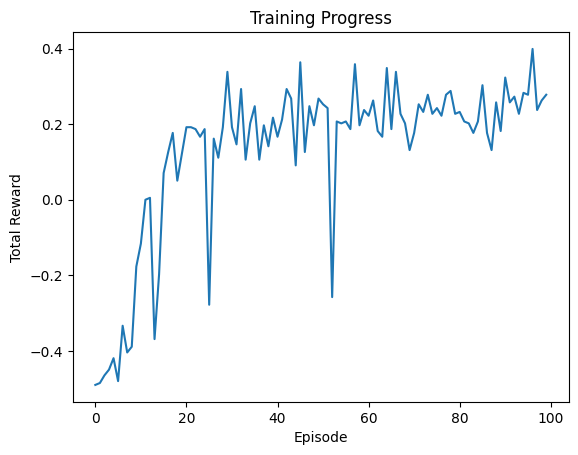

In [8]:
runner.run()

### Test

In [14]:
runner.eval(num_episodes=3, episode_length=300, deterministic=True, verbose=False, verbose_render=True)

.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|1|.|.|.|.|.|.|.|.|.|.|.|.|C|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|2|.|.|.|.|.|.|.|.
.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|1|.|.|.|.|.|.|.|.|.|.|.|.|C|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|2|.|.|.|.|.|.|.|.|.
.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|1|.|.|.|.|.|.|.|.|.|.|.|.|.|C|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|2|.|.|.|.|.|.|.|.|.
.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|1|.|.|.|.|.|.|.|.|.|.|.|.|.|C|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|2|.|.|.|.|.|.|.|.|.|.
.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|1|.|.|.|.|.|.|.|.|.|.|.|.|.|.|C|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|2|.|.|.|.|.|.|.|.|.|.
.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|1|.|.|.|.|.|.|.|.|.|.|.|.|.|.|C|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|2|.|.|.|.|.|.|.|.|.|.|.
.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|1|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|C|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|2|.|.|.|.|.|.|.|.|.|.|.
.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|.|1|.|.|.|.|.|.|.|.|.|.|.|

In [10]:
env = CorridorMultiAgentEnv(3, 2)

obs, share_obs, av, info = env.reset()
print(env.robot_position)
for ag in info:
    print(ag, info[ag])


{'robot_1': 0, 'robot_2': 2}
robot_1 {'walls': [1, 0], 'coin': [0, 0, 1], 'another_robot': [0, 0], 'is coin collected': 0, 'found walls': [1, 0], 'found agents': [0, 0], 'your turn': 0, 'avail.actions': array([1, 0, 0, 0, 0]), 'share_obs': array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0])}
robot_2 {'walls': [0, 1], 'coin': [1, 0, 0], 'another_robot': [0, 0], 'is coin collected': 0, 'found walls': [0, 1], 'found agents': [0, 0], 'your turn': 1, 'avail.actions': array([0, 1, 1, 0, 0]), 'share_obs': array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0])}


In [11]:
obs, share_obs, available_actions, info = env.reset()
available_actions

array([[1, 0, 0, 0, 0],
       [0, 1, 1, 0, 0]])

In [12]:
done = False
obs, share_obs, available_actions, info = env.reset()
rewards_cum = {'robot_1': 0, 'robot_2': 0}
while not done:
    
    # choose actions
    action_dict = {}
    for agent_id in available_actions:
        mask = available_actions[agent_id]
        av_act_agent = np.where(np.array(mask)==1)[0]
        action_dict[agent_id] = action = np.random.choice(av_act_agent)
    
    obs, share_obs, available_actions, rewards, done, info = env.step(action_dict)
    rewards_cum['robot_1'] += rewards['robot_1']
    rewards_cum['robot_2'] += rewards['robot_2']
    
        
    
    
    


TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
info

In [ ]:
action_dict = {}
for agent_id in available_actions:
    mask = available_actions[agent_id]
    av_act_agent = np.where(np.array(mask)==1)[0]
    action_dict[agent_id] = action = np.random.choice(av_act_agent)
action_dict